# Covid Visualizations

Author: James Hoctor

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import covid

In [2]:
df = covid.data_loaders.get_historic_states_data()

In [3]:
df.notna().mean()

date                                      1.000000
country                                   1.000000
state                                     1.000000
county                                    0.000000
fips                                      1.000000
lat                                       0.000000
long                                      0.000000
locationId                                1.000000
actuals.cases                             0.989539
actuals.deaths                            0.990775
actuals.positiveTests                     0.972579
actuals.negativeTests                     0.980314
actuals.contactTracers                    0.844761
actuals.hospitalBeds.capacity             0.658678
actuals.hospitalBeds.currentUsageTotal    0.658678
actuals.hospitalBeds.currentUsageCovid    0.658678
unused1                                   0.000000
actuals.icuBeds.capacity                  0.658678
actuals.icuBeds.currentUsageTotal         0.658678
actuals.icuBeds.currentUsageCov

In [4]:
df["state"].nunique()

53

In [5]:
df["metrics.vaccinationsCompletedRatio"].isna().mean()

0.5687113647170708

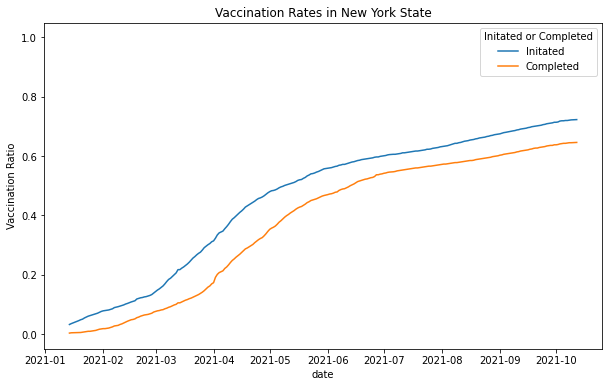

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ny_df = df[df["state"] == "NY"]

to_plot_p1 = ny_df \
    [["date", "metrics.vaccinationsInitiatedRatio"]] \
    .rename(columns={
        "metrics.vaccinationsInitiatedRatio": "Vaccination Ratio"
    })
to_plot_p1["Initated or Completed"] = "Initated"

to_plot_p2 = ny_df \
    [["date", "metrics.vaccinationsCompletedRatio"]] \
    .rename(columns={
        "metrics.vaccinationsCompletedRatio": "Vaccination Ratio"
    })
to_plot_p2["Initated or Completed"] = "Completed"

to_plot = pd.concat(
    (to_plot_p1, to_plot_p2),
    ignore_index=True,
)

sns.lineplot(
    x="date",
    y="Vaccination Ratio",
    hue="Initated or Completed",
    data=to_plot,
    ax=ax,
)

ax.set_ylim(-0.05, 1.05)
ax.set_title("Vaccination Rates in New York State");